In [186]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle


In [187]:
Pi = np.pi
n = 32
L = 2 * np.pi
dx = L / n
dt = 0.01
tf = 100


In [188]:
n / 2 - 10



6.0

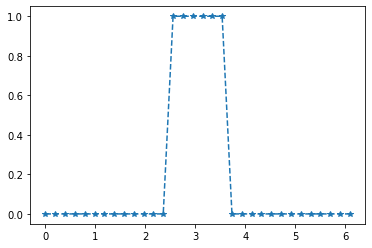

In [189]:
# x and y
x = np.linspace(0, 2 * Pi - dx, n)
# y = np.random.random(n)

y = np.zeros((n,))

width = int(np.floor(n * 0.1))
left = int(n / 2 - width)
right = int(n / 2 + width)
y[left:right] = 1

plt.figure()
plt.plot(x, y, "*--")


$ \frac{\partial y}{\partial t} = \frac{\partial^2 y }{\partial x^2} $

$ \frac{ \partial \hat{y} }{\partial t } = -|k|^2 \hat{y}$

$ \frac{\hat{y}^{t+1} - \hat{y}^{t}}{\Delta t} = -|k|^2 \hat{y}^{t+1}$

$ \hat{y}^{t+1} - \hat{y}^{t} = -\Delta t|k|^2 \hat{y}^{t+1}$

$ \hat{y}^{t+1} + \Delta t|k|^2 \hat{y}^{t+1} = \hat{y}^{t} $

$ \hat{y}^{t+1} = \frac{\hat{y}^{t}} {1 + \Delta t|k|^2} $


In [190]:
def live_plot(x, y, figsize=(7, 5), title="", ylim=[0, 1]):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(x, np.real(y), "*-")
    plt.ylim(ylim)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.pause(0.1)


In [191]:
%matplotlib inline

yOld = y
ylim = [np.min(y), np.max(y)]
k = 2 * Pi / L * np.concatenate((np.arange(0, n / 2), np.arange(-n / 2, 0)))  # or np.fft.fftfreq(100, d=dx/L)
k2 = np.power(k, 2)

data = y.reshape(1,-1)
tArray = np.array([0])
for t in range(0,tf):
    yOldHat = np.fft.fft(yOld)
    yNewHat = np.divide(yOldHat , 1 + dt*k2)
    yNew = np.fft.ifft(yNewHat)
    yOld = np.real(yNew)
    data = np.append(data, yOld.reshape(1,-1), axis=0)
    tArray = np.append(tArray, t*dt)
    # live_plot(x, yOld, title=f't={t}', ylim=ylim)


In [192]:
store_data = {
    "data": data,
    "timeArray": tArray,
    "dt": dt,
    "n": n,
    "L": L,
    "dx": dx,
    "tf": tf,
}

# Store data (serialize)
with open("filename.pickle", "wb") as handle:
    pickle.dump(store_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
